<a href="https://colab.research.google.com/github/douglascdsantos/alura_data-science-series-temporais/blob/main/comercial_aco.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [108]:
import  datetime
import  pandas                    as      pd
import  seaborn                   as      sns
import  numpy                     as      np
import  matplotlib.pyplot         as      plt
from    pandas.plotting           import  autocorrelation_plot
from    statsmodels.tsa.seasonal  import  seasonal_decompose
!pip install xlrd==1.2.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [109]:
dir_plan = 'https://acobrasil.org.br/site/wp-content/uploads/2022/06/Performance-Mensal_2022.05.xls'
# importando o arquivo
planilha = pd.read_excel(dir_plan,'Perfomance Mensal-Monthly', skiprows = 5, skipfooter = 3, index_col = 'Unnamed: 0').T
# corrigingo os nomes das colunas
planilha.columns = [entrada.split(' /')[0] for entrada in planilha.columns]
# alterando o index para data a partir do ano de 2013
planilha.reset_index(drop = True, inplace = True)
planilha.index = [datetime.date( ano, mes, 1) for ano in range(2013,2023) for mes in range(1,13)][:planilha.shape[0]]
# removendo as colunas sem valores
planilha.dropna(axis =1, how='all', inplace = True)
planilha

,Aço Bruto,Laminados,Planos,Longos,Semiacabados P/ Vendas,Placas,Blocos e Tarugos,Ferro-Gusa,Vendas Internas,Laminados,...,(US$ Milhões,Laminados,Planos,Longos,Semiacabados P/ Vendas,Total (Mil t,(US$ Milhões,Consumo Aparente,Planos,Longos
2013-01-01,2769.437000,2051.441000,1202.482000,848.959000,470.371000,394.660000,75.711000,2178.041000,1905.81900,1852.831000,...,573.500000,277.653000,140.752000,136.901000,1.196000,278.849000,369.978000,2167.705000,1261.809000,905.896000
2013-02-01,2574.894000,1942.836000,1144.078000,798.758000,480.793000,417.568000,63.225000,1999.501000,1791.61900,1754.210000,...,509.969000,294.211000,155.913000,138.298000,0.160000,294.371000,311.089000,2069.840000,1195.402000,874.438000
2013-03-01,2858.521000,2194.384000,1261.646000,932.738000,550.726000,435.452000,115.274000,2157.547000,2062.86500,2006.225000,...,474.159000,271.067000,140.296000,130.771000,0.288000,271.355000,322.156000,2330.914000,1311.942000,1018.972000
2013-04-01,2913.622000,2211.587000,1233.065000,978.522000,459.709000,386.750000,72.959000,2239.881000,2074.20500,2010.304000,...,539.518000,329.344000,188.103000,141.241000,0.523000,329.867000,373.559000,2402.633000,1367.514000,1035.119000
2013-05-01,2999.775000,2354.716000,1311.414000,1043.302000,442.191000,346.131000,96.060000,2240.067000,2193.01300,2129.468000,...,507.626000,264.948000,148.586000,116.362000,1.496000,266.444000,342.873000,2456.820000,1403.178000,1053.642000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-02-01,2713.216000,1881.152000,1092.815000,788.337000,610.897000,539.513000,71.384000,2101.716000,1555.93100,1531.421000,...,760.329000,281.640000,179.744000,101.896000,15.731000,297.371000,388.802000,1842.632000,1088.598000,754.034000
2022-03-01,2988.279000,2143.586000,1238.222000,905.364000,683.356000,573.104000,110.252000,2255.852000,1852.23700,1817.481000,...,1039.838000,237.232000,158.946000,78.286000,6.540000,243.772000,374.818000,2097.429000,1214.806000,882.623000
2022-04-01,2922.955000,2031.507000,1184.872000,846.635000,822.205000,740.575000,81.630000,2316.471000,1761.69000,1733.718000,...,906.166000,221.745000,152.237000,69.508000,0.909000,222.654000,350.571000,1985.726000,1136.557000,849.169000
2022-05-01,2971.618000,2010.829000,1123.518000,887.311000,644.147000,539.558000,104.589000,2264.000000,1823.67700,1759.397000,...,1044.292000,267.451000,174.425000,93.026000,8.406000,275.857000,429.487000,2100.482000,1209.033000,891.449000


In [110]:
data = pd.DataFrame(planilha['Aço Bruto'][:-1]).reset_index()
data.columns = ['data', 'producao']
data.head()

,data,producao
0,2013-01-01,2769.437
1,2013-02-01,2574.894
2,2013-03-01,2858.521
3,2013-04-01,2913.622
4,2013-05-01,2999.775


In [111]:
data['data'] = pd.to_datetime(data['data'])
data.dtypes

data        datetime64[ns]
producao           float64
dtype: object

In [112]:
data['aumento'] = data['producao'].diff()
data['aceleracao'] = data['aumento'].diff()
data.head()

,data,producao,aumento,aceleracao
0,2013-01-01,2769.437,NaN,NaN
1,2013-02-01,2574.894,-194.543,NaN
2,2013-03-01,2858.521,283.627,478.170
3,2013-04-01,2913.622,55.101,-228.526
4,2013-05-01,2999.775,86.153,31.052


In [113]:
sns.set_palette('Accent')
sns.set_style('darkgrid')

In [114]:
def plotar(titulo, labelx, labely, x, y, dataset):
  ax = sns.lineplot(data = dataset, y = y, x = x)
  ax.figure.set_size_inches((12,6))
  ax.set_title(titulo, loc = 'left', fontsize = 18)
  ax.set_ylabel(labelx, fontsize = 14)
  ax.set_xlabel(labely, fontsize = 14);

In [115]:
def plot_comparacao(x, y1, y2, y3, dataset, titulo):
  plt.figure(figsize = (16,12))
  ax = plt.subplot(3,1,1)
  ax.set_title(titulo, fontsize = 18, loc = 'left')
  sns.lineplot(data = dataset, y = y1, x = x)
  plt.subplot(3,1,2)
  sns.lineplot(data = dataset, y = y2, x = x)
  plt.subplot(3,1,3)
  sns.lineplot(data = dataset, y = y3, x = x);

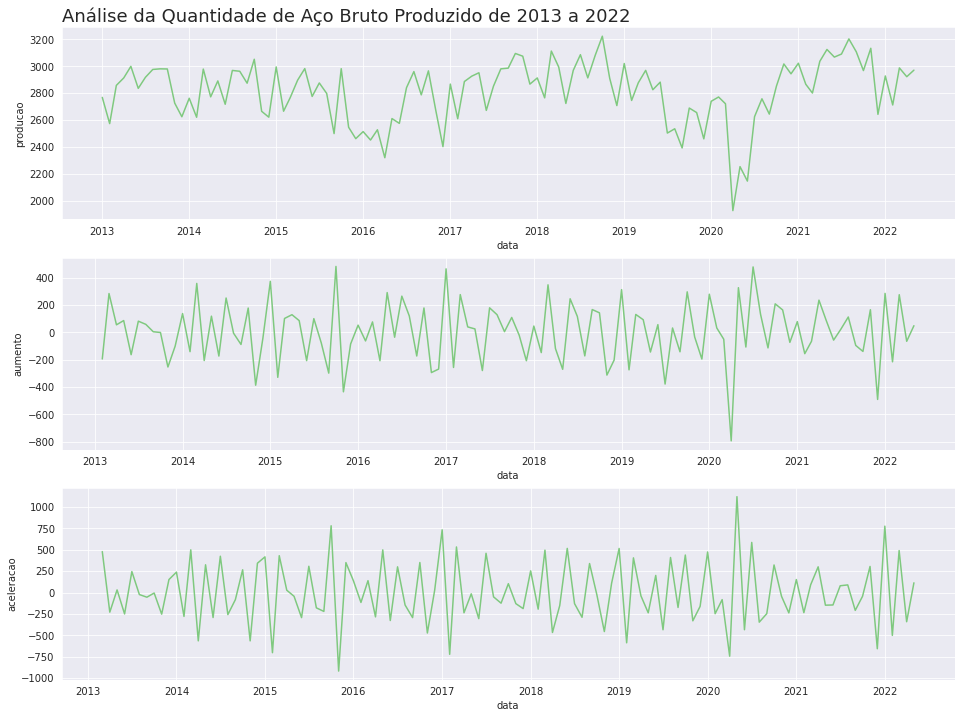

In [116]:
plot_comparacao('data', 'producao', 'aumento', 'aceleracao', data, 'Análise da Quantidade de Aço Bruto Produzido de 2013 a 2022')

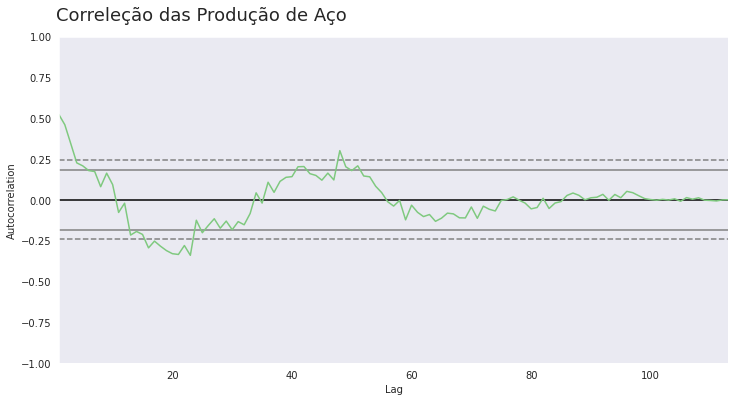

In [117]:
ax = plt.figure(figsize = (12,6))
autocorrelation_plot(data['producao'])
ax.suptitle('Correleção das Produção de Aço', fontsize = 18, x = .29, y = .95);

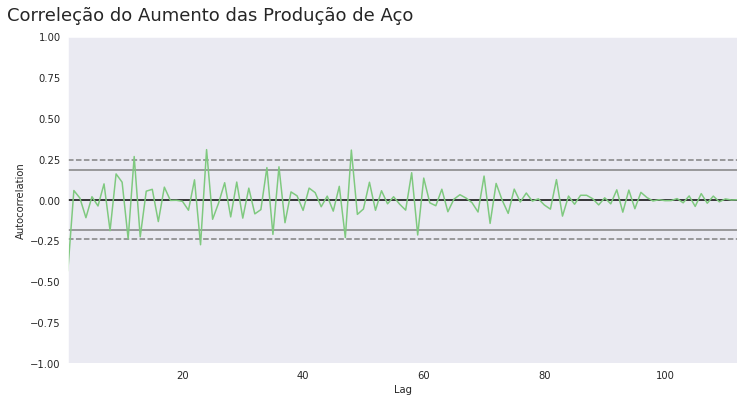

In [118]:
ax = plt.figure(figsize = (12,6))
autocorrelation_plot(data['aumento'][1:])
ax.suptitle('Correleção do Aumento das Produção de Aço', fontsize = 18, x = .29, y = .95);

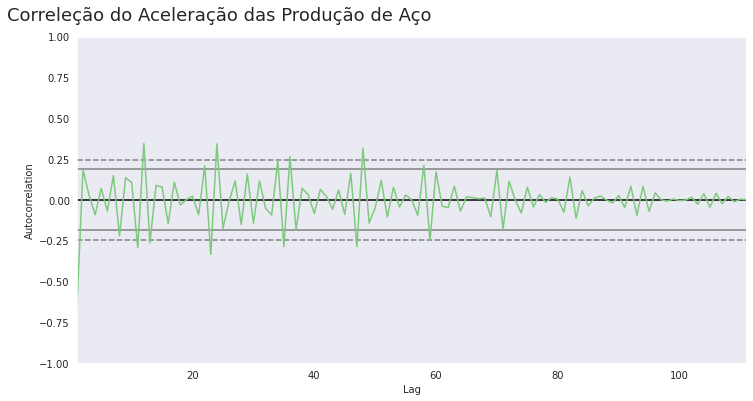

In [119]:
ax = plt.figure(figsize = (12,6))
autocorrelation_plot(data['aceleracao'][2:])
ax.suptitle('Correleção do Aceleração das Produção de Aço', fontsize = 18, x = .29, y = .95);

In [120]:
data['mes'] = data['data'].dt.month
data['ano'] = data['data'].dt.year
data.head()

,data,producao,aumento,aceleracao,mes,ano
0,2013-01-01,2769.437,NaN,NaN,1,2013
1,2013-02-01,2574.894,-194.543,NaN,2,2013
2,2013-03-01,2858.521,283.627,478.170,3,2013
3,2013-04-01,2913.622,55.101,-228.526,4,2013
4,2013-05-01,2999.775,86.153,31.052,5,2013


In [121]:
vendas_agrupadas_mes = data.groupby('mes')['producao', 'aumento', 'aceleracao'].mean().round(1)
vendas_agrupadas_mes

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,producao,aumento,aceleracao
mes,,,
1,2853.8,225.2,410.3
2,2679.4,-174.5,-397.4
3,2852.6,173.2,347.7
4,2768.7,-83.9,-257.1
5,2834.2,65.5,149.4
6,2738.9,-80.0,-147.4
7,2863.0,124.0,204.0
8,2899.4,36.4,-87.6
9,2817.8,-81.6,-118.0


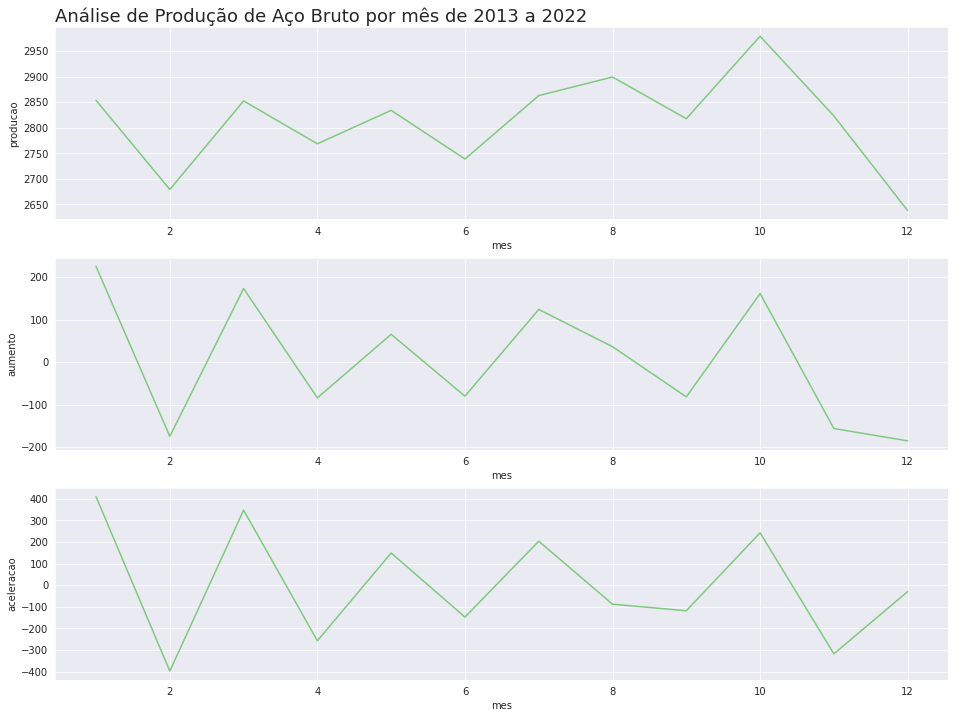

In [122]:
plot_comparacao('mes', 'producao', 'aumento', 'aceleracao', vendas_agrupadas_mes.reset_index(), 'Análise de Produção de Aço Bruto por mês de 2013 a 2022')

In [123]:
vendas_agrupadas_ano = data.groupby('ano')['producao', 'aumento', 'aceleracao'].mean().round(1)
vendas_agrupadas_ano

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,producao,aumento,aceleracao
ano,,,
2013,2846.9,-13.1,9.3
2014,2824.8,-0.3,4.8
2015,2771.5,-13.3,-3.4
2016,2636.9,-4.9,-15.3
2017,2898.1,38.6,5.1
2018,2950.5,-13.3,0.4
2019,2714.1,-20.6,0.6
2020,2617.9,40.2,10.2
2021,3005.9,-25.1,-34.8


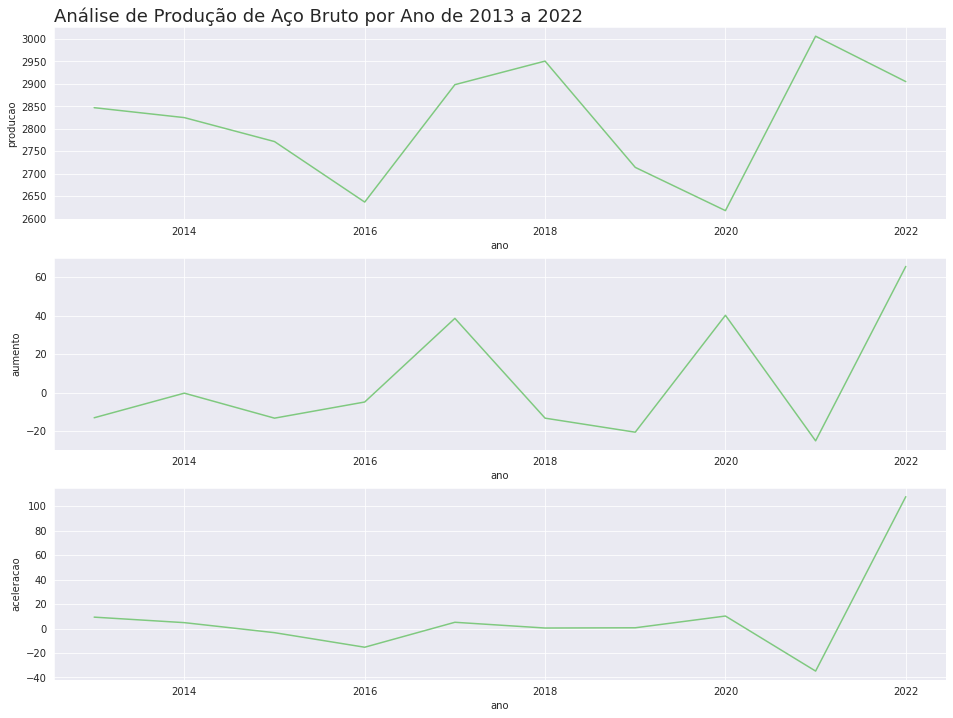

In [124]:
plot_comparacao('ano', 'producao', 'aumento', 'aceleracao', vendas_agrupadas_ano.reset_index(), 'Análise de Produção de Aço Bruto por Ano de 2013 a 2022')

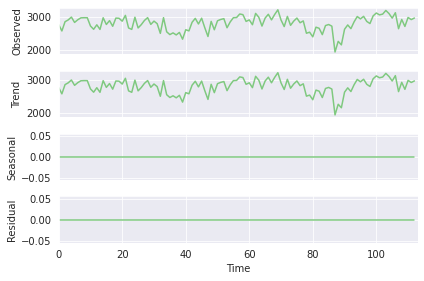

In [125]:
resultado = seasonal_decompose([data['producao']], freq = 1)
ax = resultado.plot()

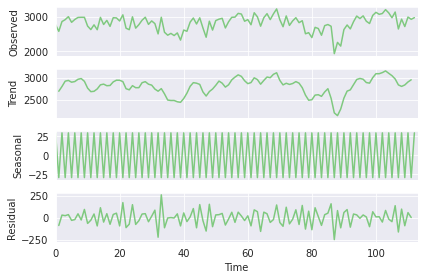

In [126]:
resultado = seasonal_decompose([data['producao']], freq = 2)
ax = resultado.plot()

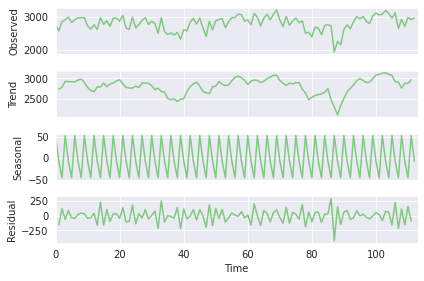

In [127]:
resultado = seasonal_decompose([data['producao']], freq = 3)
ax = resultado.plot()

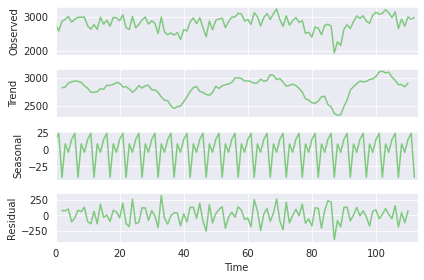

In [128]:
resultado = seasonal_decompose([data['producao']], freq = 5)
ax = resultado.plot()

In [129]:
observacao = resultado.observed
tendencia = resultado.trend
sazonalidade = resultado.seasonal
ruido = resultado.resid

In [130]:
df = ({
    'observacao': observacao,
    'tendencia': tendencia,
    'sazonalidade': sazonalidade,
    'ruido': ruido
})
resultado = pd.DataFrame(df)
resultado.head()

,observacao,tendencia,sazonalidade,ruido
0,2769.437,NaN,14.464167,NaN
1,2574.894,NaN,23.276152,NaN
2,2858.521,2823.2498,-41.130424,76.401624
3,2913.622,2836.6694,7.850012,69.102588
4,2999.775,2905.3388,-4.459906,98.896106


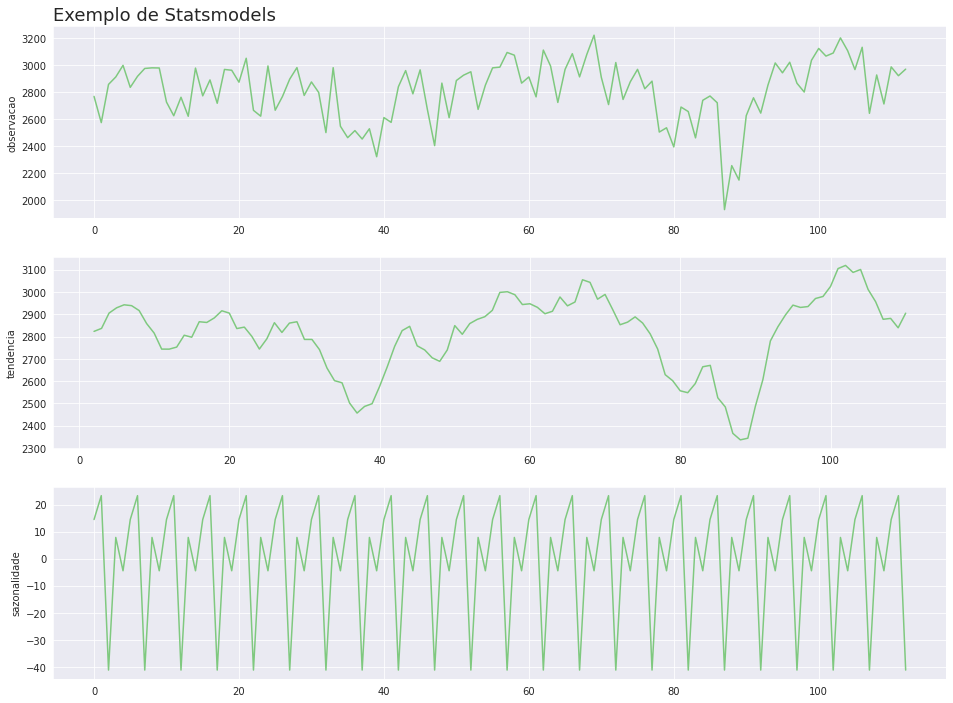

In [131]:
plot_comparacao(resultado.index, 'observacao', 'tendencia', 'sazonalidade', resultado, 'Exemplo de Statsmodels')

In [133]:
data['media_movel_3_meses'] = data['producao'].rolling(3).mean()
data['media_movel_6_meses'] = data['producao'].rolling(6).mean()
data.head(10)

,data,producao,aumento,aceleracao,mes,ano,media_movel_3_meses,media_movel_6_meses
0,2013-01-01,2769.437,NaN,NaN,1,2013,NaN,NaN
1,2013-02-01,2574.894,-194.543,NaN,2,2013,NaN,NaN
2,2013-03-01,2858.521,283.627,478.170,3,2013,2734.284000,NaN
3,2013-04-01,2913.622,55.101,-228.526,4,2013,2782.345667,NaN
4,2013-05-01,2999.775,86.153,31.052,5,2013,2923.972667,NaN
5,2013-06-01,2836.535,-163.240,-249.393,6,2013,2916.644000,2825.464000
6,2013-07-01,2918.241,81.706,244.946,7,2013,2918.183667,2850.264667
7,2013-08-01,2976.770,58.529,-23.177,8,2013,2910.515333,2917.244000
8,2013-09-01,2981.309,4.539,-53.990,9,2013,2958.773333,2937.708667
9,2013-10-01,2980.320,-0.989,-5.528,10,2013,2979.466333,2948.825000


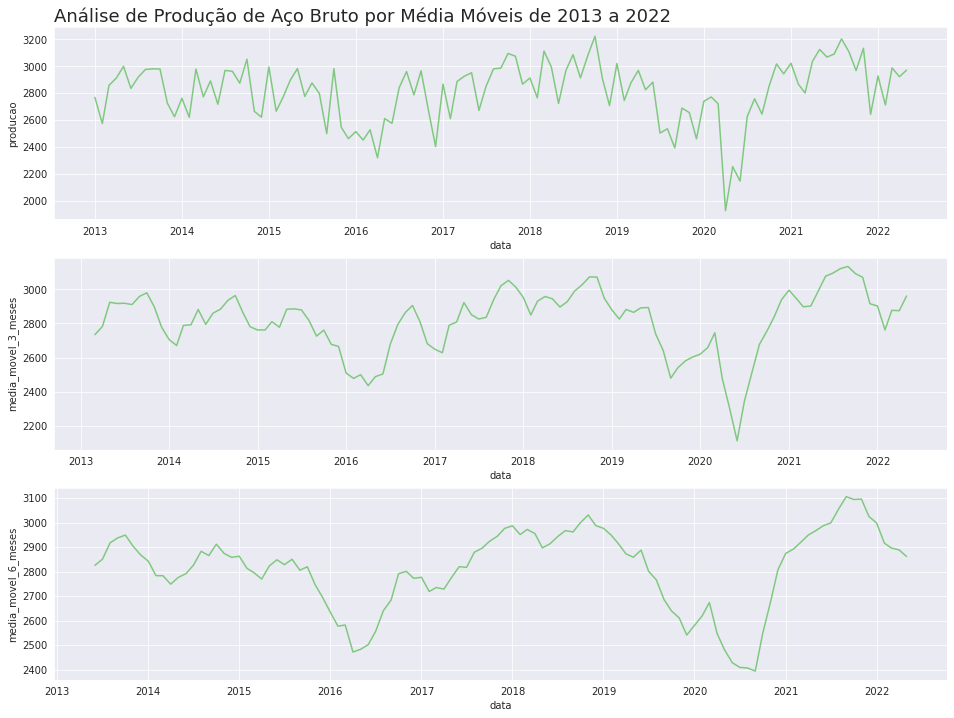

In [135]:
plot_comparacao('data', 'producao', 'media_movel_3_meses', 'media_movel_6_meses', data, 'Análise de Produção de Aço Bruto por Média Móveis de 2013 a 2022')

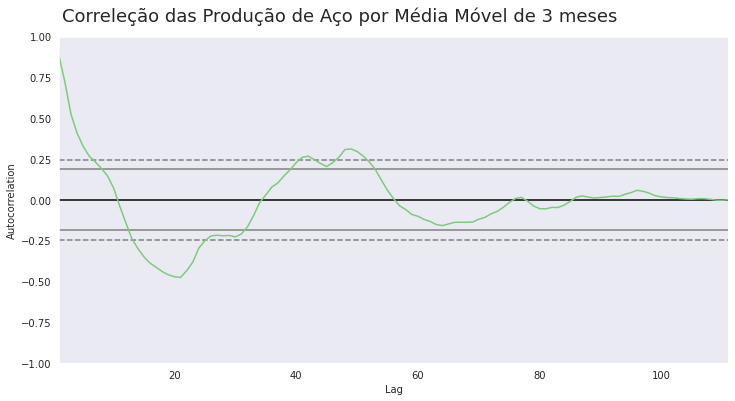

In [141]:
ax = plt.figure(figsize = (12,6))
autocorrelation_plot(data['media_movel_3_meses'].dropna())
ax.suptitle('Correleção das Produção de Aço por Média Móvel de 3 meses', fontsize = 18, x = .45, y = .95);

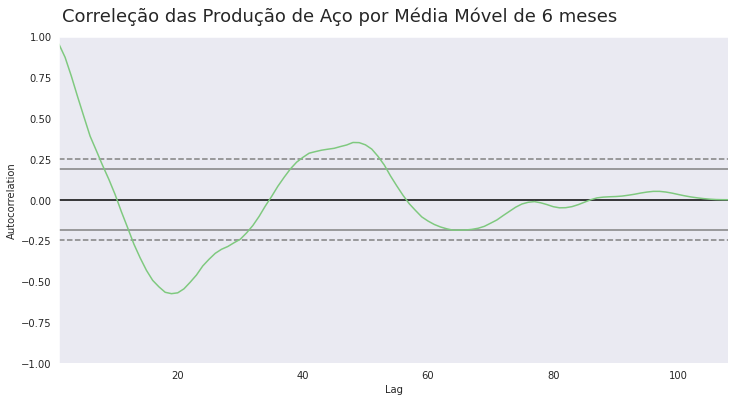

In [140]:
ax = plt.figure(figsize = (12,6))
autocorrelation_plot(data['media_movel_6_meses'].dropna())
ax.suptitle('Correleção das Produção de Aço por Média Móvel de 6 meses', fontsize = 18, x = .45, y = .95);